In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import math

In [32]:
# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    return int(file_name.split('.')[0].replace('subject', '')) - 1  # Subtract 1 to make labels start from 0

# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = './cropped'

for file_name in os.listdir(dataset_dir):
    if (not (file_name.endswith(".jpg"))):
        continue
    img = plt.imread(os.path.join(dataset_dir, file_name))
    print(file_name,img.shape)
    data.append(img.flatten())  # Flatten image into a 1D array
    #print(data)
    labels.append(extract_person_label(file_name))

labels = np.array(labels)
remap_data = []
for i in data:
    remap_data.append(np.array(i))

data=remap_data
print(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
len(X_train),len(y_train), len(X_test), len(y_test)

5.1.jpg (348, 348)
5.3.jpg (178, 178)
5.2.jpg (294, 294)
1.2.jpg (417, 417)
5.6.jpg (222, 222)
3.1.jpg (226, 226)
1.1.jpg (378, 378)
5.5.jpg (374, 374)
5.4.jpg (283, 283)
4.3.jpg (369, 369)
4.2.jpg (370, 370)
4.1.jpg (454, 454)
4.5.jpg (371, 371)
2.3.jpg (283, 283)
2.2.jpg (215, 215)
4.4.jpg (963, 963)
4.6.jpg (532, 532)
2.1.jpg (450, 450)
[4 4 4 0 4 2 0 4 4 3 3 3 3 1 1 3 3 1]


(14, 14, 4, 4)

[7, 0, 1]


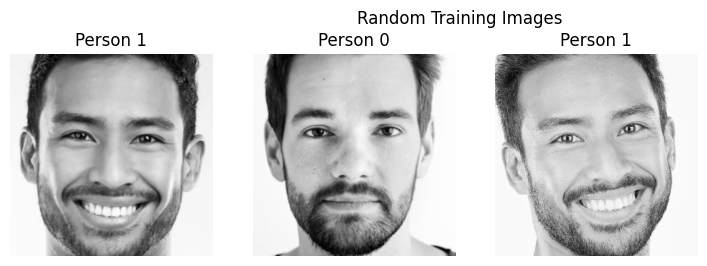

[2, 3, 0]


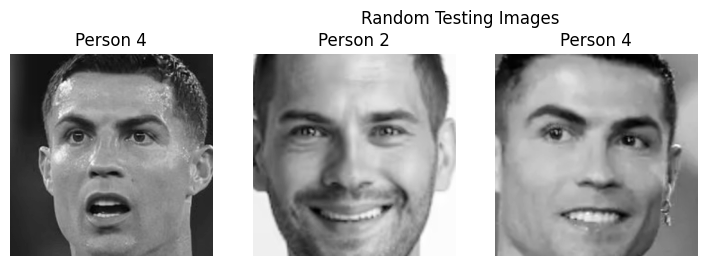

In [33]:
# Randomly select four indices from the training dataset
train_indices = random.sample(range(len(X_train)), 3)

# Randomly select four indices from the testing dataset
test_indices = random.sample(range(len(X_test)), 3)

# Function to display images
def display_images(images, labels, title):
    plt.figure(figsize=(12, 3))
    plt.suptitle(title)
    for i, (image, label) in enumerate(zip(images, labels), 1):
        plt.subplot(1, 4, i)
        shape = int(math.sqrt((len(image))))
        plt.imshow(image.reshape((shape,shape)), cmap='gray')
        plt.title(f"Person {label}")
        plt.axis('off')
    plt.show()
print(train_indices)
# Display four random training images
train_images_to_display = []
train_labels_to_display = []
for i in train_indices:
    train_images_to_display.append(X_train[i])
    train_labels_to_display.append(y_train[i])
display_images(train_images_to_display, train_labels_to_display, "Random Training Images")
print(test_indices)
# Display four random testing images
test_images_to_display = []
test_labels_to_display = []
for i in test_indices:
    test_images_to_display.append(X_test[i])
    test_labels_to_display.append(y_test[i])
display_images(test_images_to_display, test_labels_to_display, "Random Testing Images")

In [34]:
%%time
#training classifier
classifier_type = SVC()
params = [{'gamma': [0.01, 0.001, 0.001], 'C': [1, 10, 100, 1000]}]
#create a gridsearchcv object with estimator SVC
grid_search = GridSearchCV(classifier_type, params)
print(1)
#training
print(X_train, y_train)
grid_search.fit(X_train, y_train)


1
[array([240, 240, 240, ..., 104, 104, 104], dtype=uint8), array([247, 248, 248, ..., 249, 249, 249], dtype=uint8), array([ 46,  58,  57, ..., 172, 177, 180], dtype=uint8), array([ 68,  66,  63, ..., 201, 193, 188], dtype=uint8), array([49, 49, 48, ..., 84, 46, 24], dtype=uint8), array([135, 134, 134, ..., 170, 169, 169], dtype=uint8), array([45, 45, 50, ..., 87, 86, 84], dtype=uint8), array([229, 229, 229, ..., 234, 234, 234], dtype=uint8), array([136, 135, 134, ..., 137, 139, 142], dtype=uint8), array([198, 199, 153, ..., 212, 212, 213], dtype=uint8), array([ 71,  72,  73, ..., 163, 163, 164], dtype=uint8), array([66, 69, 72, ..., 94, 95, 95], dtype=uint8), array([224, 224, 224, ..., 177, 171, 156], dtype=uint8), array([242, 242, 242, ...,  39,  33,  27], dtype=uint8)] [0 1 3 3 3 4 3 1 4 3 4 3 1 0]


/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (11,) + inhomogeneous part.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (12,) + inhomogeneous part.
